In [107]:
import pandas as pd
import matplotlib.pyplot as plt

In [84]:
df = pd.read_csv("./Austin_Animal_Center_Outcomes.csv")

In [92]:
df.head()

,animal_id,name,datetime,monthyear,date_of_birth,outcome_type,outcome_subtype,animal_type,sex_upon_outcome,age_upon_outcome,breed,color
0,a794011,chunk,2019-05-08 18:20:00,may_2019,2017-05-02,rto-adopt,NaN,cat,neutered_male,2_years,domestic_shorthair_mix,brown_tabby/white
1,a776359,gizmo,2018-07-18 16:02:00,jul_2018,2017-07-12,adoption,NaN,dog,neutered_male,1_year,chihuahua_shorthair_mix,white/brown
2,a821648,NaN,2020-08-16 11:38:00,aug_2020,2019-08-16,euthanasia,NaN,other,unknown,1_year,raccoon,gray
3,a720371,moose,2016-02-13 17:59:00,feb_2016,2015-10-08,adoption,NaN,dog,neutered_male,4_months,anatol_shepherd/labrador_retriever,buff
4,a674754,NaN,2014-03-18 11:47:00,mar_2014,2014-03-12,transfer,partner,cat,intact_male,6_days,domestic_shorthair_mix,orange_tabby


In [86]:
df.columns = df.columns.str.replace(" ", '_').str.lower()

In [87]:
df['datetime'] =  pd.to_datetime(df['datetime'], errors='coerce')

In [88]:
df['date_of_birth'] =  pd.to_datetime(df['date_of_birth'], errors='coerce')

In [112]:
df['age'] = (df.datetime - df.date_of_birth).dt.total_seconds() / 60


In [113]:
df.head()

,animal_id,name,datetime,monthyear,date_of_birth,outcome_type,outcome_subtype,animal_type,sex_upon_outcome,age_upon_outcome,breed,color,age
0,a794011,chunk,2019-05-08 18:20:00,may_2019,2017-05-02,rto-adopt,NaN,cat,neutered_male,2_years,domestic_shorthair_mix,brown_tabby/white,1060940.0
1,a776359,gizmo,2018-07-18 16:02:00,jul_2018,2017-07-12,adoption,NaN,dog,neutered_male,1_year,chihuahua_shorthair_mix,white/brown,535202.0
2,a821648,NaN,2020-08-16 11:38:00,aug_2020,2019-08-16,euthanasia,NaN,other,unknown,1_year,raccoon,gray,527738.0
3,a720371,moose,2016-02-13 17:59:00,feb_2016,2015-10-08,adoption,NaN,dog,neutered_male,4_months,anatol_shepherd/labrador_retriever,buff,185399.0
4,a674754,NaN,2014-03-18 11:47:00,mar_2014,2014-03-12,transfer,partner,cat,intact_male,6_days,domestic_shorthair_mix,orange_tabby,9347.0


<AxesSubplot:>

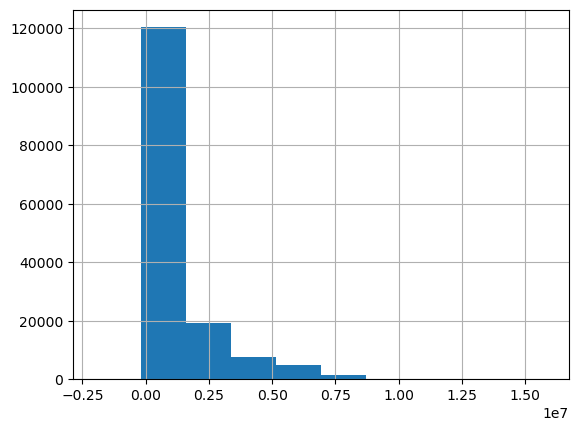

In [114]:
df.age.hist()

In [117]:
df.columns

Index(['animal_id', 'name', 'datetime', 'monthyear', 'date_of_birth',
       'outcome_type', 'outcome_subtype', 'animal_type', 'sex_upon_outcome',
       'age_upon_outcome', 'breed', 'color', 'age'],
      dtype='object')

In [122]:
df_dogs = df.loc[df['animal_type'] == 'dog']

In [125]:
df_dogs.outcome_type.value_counts()

adoption           41591
return_to_owner    21506
transfer           19024
euthanasia          2007
rto-adopt            819
died                 347
disposal              66
missing               32
stolen                 5
Name: outcome_type, dtype: int64

In [96]:
df[['age', 'age_upon_outcome']]

,age,age_upon_outcome
0,736 days 18:20:00,2_years
1,371 days 16:02:00,1_year
2,366 days 11:38:00,1_year
3,128 days 17:59:00,4_months
4,6 days 11:47:00,6_days
...,...,...
153342,3708 days 11:42:00,10_years
153343,397 days 15:39:00,1_year
153344,99 days 17:22:00,3_months
153345,107 days 14:13:00,3_months


TypeError: The DType <class 'numpy.dtype[timedelta64]'> could not be promoted by <class 'numpy.dtype[float64]'>. This means that no common DType exists for the given inputs. For example they cannot be stored in a single array unless the dtype is `object`. The full list of DTypes is: (<class 'numpy.dtype[timedelta64]'>, <class 'numpy.dtype[float64]'>)

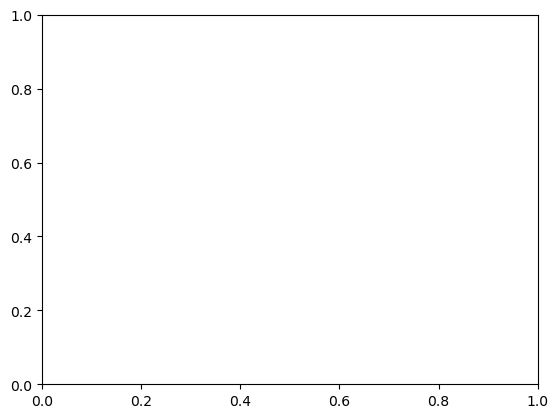

In [109]:
plt.hist(df['age'], bins=50)

In [93]:
df.dtypes

animal_id                   object
name                        object
datetime            datetime64[ns]
monthyear                   object
date_of_birth       datetime64[ns]
outcome_type                object
outcome_subtype             object
animal_type                 object
sex_upon_outcome            object
age_upon_outcome            object
breed                       object
color                       object
dtype: object

In [90]:
for c in df.columns:
    if df[c].dtype == 'object':
        df[c] = df[c].str.replace(" ", "_").str.lower()

In [91]:
df.isnull().sum()

animal_id               0
name                44301
datetime                0
monthyear               0
date_of_birth           0
outcome_type           28
outcome_subtype     82767
animal_type             0
sex_upon_outcome        2
age_upon_outcome       40
breed                   0
color                   0
dtype: int64

In [77]:
df['date_of_birth'] =  pd.to_datetime(df['date_of_birth'], errors='coerce')

In [81]:
df['datetime'] =  pd.to_datetime(df['datetime'], errors='coerce')

In [82]:
df.isnull().sum()

animal_id                0
name                 44301
datetime            153347
monthyear                0
date_of_birth            0
outcome_type            28
outcome_subtype      82767
animal_type              0
sex_upon_outcome         2
age_upon_outcome        40
breed                    0
color                    0
dtype: int64

In [80]:
df.dtypes

animal_id                   object
name                        object
datetime                    object
monthyear                   object
date_of_birth       datetime64[ns]
outcome_type                object
outcome_subtype             object
animal_type                 object
sex_upon_outcome            object
age_upon_outcome            object
breed                       object
color                       object
dtype: object

In [56]:
df_sorted = df.sort_values(by='datetime')

In [62]:
df = df.applymap(lambda x: x.lower().replace(' ', '_'))

AttributeError: 'float' object has no attribute 'lower'

In [58]:
df.datetime.dtype

dtype('O')

In [59]:
df['datetime'] = pd.to_datetime(df['datetime'], errors='coerce')

In [60]:
df.dtypes

animal_id                   object
name                        object
datetime            datetime64[ns]
monthyear                   object
date_of_birth               object
outcome_type                object
outcome_subtype             object
animal_type                 object
sex_upon_outcome            object
age_upon_outcome            object
breed                       object
color                       object
dtype: object

In [61]:
df.isnull().sum()

animal_id               0
name                44301
datetime                0
monthyear               0
date_of_birth           0
outcome_type           28
outcome_subtype     82767
animal_type             0
sex_upon_outcome        2
age_upon_outcome       40
breed                   0
color                   0
dtype: int64

In [57]:
df_sorted.head()

,animal_id,name,datetime,monthyear,date_of_birth,outcome_type,outcome_subtype,animal_type,sex_upon_outcome,age_upon_outcome,breed,color
107270,A669926,NaN,01/01/2014 01:00:00 PM,Jan 2014,05/30/2013,Transfer,Partner,Dog,Intact Female,7 months,Plott Hound/Black/Tan Hound,Brown/Tan
42930,A670044,NaN,01/01/2014 01:13:00 PM,Jan 2014,01/01/2011,Euthanasia,Suffering,Cat,Intact Male,3 years,Domestic Shorthair Mix,Blue
117402,A668314,Duke,01/01/2014 01:30:00 PM,Jan 2014,12/02/2012,Transfer,Partner,Dog,Neutered Male,1 year,Labrador Retriever Mix,Chocolate/White
89624,A666770,Josh,01/01/2014 01:32:00 PM,Jan 2014,11/07/2010,Adoption,NaN,Dog,Neutered Male,3 years,Siberian Husky Mix,Black/Brown
77144,A668337,*Tony,01/01/2014 01:42:00 PM,Jan 2014,12/02/2012,Euthanasia,Behavior,Dog,Intact Male,1 year,Pit Bull Mix,Brown Brindle/White


In [14]:
df.columns = df.columns.str.replace(' ', '_').str.lower()

In [15]:
df.columns

Index(['animal_id', 'name', 'datetime', 'monthyear', 'date_of_birth',
       'outcome_type', 'outcome_subtype', 'animal_type', 'sex_upon_outcome',
       'age_upon_outcome', 'breed', 'color'],
      dtype='object')

In [26]:
df.breed.value_counts().loc[df.breed.value_counts() > 20]

Domestic Shorthair Mix                   33446
Domestic Shorthair                       15312
Pit Bull Mix                              9547
Labrador Retriever Mix                    8027
Chihuahua Shorthair Mix                   6735
                                         ...  
Dogue De Bordeaux Mix                       21
Feist Mix                                   21
Chihuahua Shorthair/Italian Greyhound       21
Cane Corso Mix                              21
Mouse                                       21
Name: breed, Length: 373, dtype: int64

In [55]:
df[df.animal_type == 'Other']['breed'].value_counts().iloc[9:10].index[0]

'Skunk'

In [35]:
df[df.animal_type == 'Other']['breed'].value_counts()

Bat                            0.245411
Bat Mix                        0.216336
Raccoon                        0.087101
Raccoon Mix                    0.066404
Guinea Pig                     0.052113
                                 ...   
Deer Mix                       0.000123
Britannia Petit Mix            0.000123
Chinchilla-Stnd                0.000123
Polish Mix                     0.000123
New Zealand Wht/Lop-Holland    0.000123
Name: breed, Length: 131, dtype: float64

In [10]:
df.columns = [to_snake_case(col) for col in df.columns]

In [11]:
df.head()

,animal _i_d,name,date_time,month_year,date of _birth,outcome _type,outcome _subtype,animal _type,sex upon _outcome,age upon _outcome,breed,color
0,A794011,Chunk,05/08/2019 06:20:00 PM,May 2019,05/02/2017,Rto-Adopt,NaN,Cat,Neutered Male,2 years,Domestic Shorthair Mix,Brown Tabby/White
1,A776359,Gizmo,07/18/2018 04:02:00 PM,Jul 2018,07/12/2017,Adoption,NaN,Dog,Neutered Male,1 year,Chihuahua Shorthair Mix,White/Brown
2,A821648,NaN,08/16/2020 11:38:00 AM,Aug 2020,08/16/2019,Euthanasia,NaN,Other,Unknown,1 year,Raccoon,Gray
3,A720371,Moose,02/13/2016 05:59:00 PM,Feb 2016,10/08/2015,Adoption,NaN,Dog,Neutered Male,4 months,Anatol Shepherd/Labrador Retriever,Buff
4,A674754,NaN,03/18/2014 11:47:00 AM,Mar 2014,03/12/2014,Transfer,Partner,Cat,Intact Male,6 days,Domestic Shorthair Mix,Orange Tabby
